In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris_data= pd.DataFrame(data=iris.data, columns=["sepal length","sepal width","petal length","petal width"])
iris_target=pd.DataFrame(data=iris.target,columns=["target_names"])
dataframe=pd.concat([iris_data,iris_target],axis=1)
dataset = dataframe.values
x = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [4]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,dummy_y,test_size=0.2,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [7]:
X_Train=X_train[:90,:]
X_Val=X_train[90:,:]
y_Train=y_train[:90,:]
y_Val=y_train[90:,:]

In [8]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(4,activation='relu',input_dim=4))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [10]:
history=model.fit(X_Train,y_Train,epochs=100,batch_size=8,validation_data=(X_Val,y_Val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 90 samples, validate on 30 samples
Epoch 1/100




90/90 [==============================] - 0s - loss: 1.4434 - acc: 0.0111 - val_loss: 1.4586 - val_acc: 0.0000e+00
Epoch 2/100
90/90 [==============================] - 0s - loss: 1.3770 - acc: 0.0111 - val_loss: 1.3969 - val_acc: 0.0000e+00
Epoch 3/100
90/90 [==============================] - 0s - loss: 1.3199 - acc: 0.0111 - val_loss: 1.3454 - val_acc: 0.0000e+00
Epoch 4/100
90/90 [==============================] - 0s - loss: 1.2713 - acc: 0.0000e+00 - val_loss: 1.2986 - val_acc: 0.0000e+00
Epoch 5/100
90/90 [==============================] - 0s - loss: 1.2274 - acc: 0.0111 - val_loss: 1.2557 - val_acc: 0.0000e+00
Epoch 6/100
90/90 [==============================] - 0s - loss: 1.1866 - acc: 0.0222 - val_loss: 1.2152

90/90 [==============================] - 0s - loss: 0.4028 - acc: 0.9222 - val_loss: 0.4327 - val_acc: 0.9000
Epoch 50/100
90/90 [==============================] - 0s - loss: 0.3947 - acc: 0.9333 - val_loss: 0.4248 - val_acc: 0.9000
Epoch 51/100
90/90 [==============================] - 0s - loss: 0.3866 - acc: 0.9333 - val_loss: 0.4178 - val_acc: 0.9000
Epoch 52/100
90/90 [==============================] - 0s - loss: 0.3792 - acc: 0.9333 - val_loss: 0.4115 - val_acc: 0.9000
Epoch 53/100
90/90 [==============================] - 0s - loss: 0.3721 - acc: 0.9333 - val_loss: 0.4052 - val_acc: 0.9000
Epoch 54/100
90/90 [==============================] - 0s - loss: 0.3651 - acc: 0.9333 - val_loss: 0.3984 - val_acc: 0.9000
Epoch 55/100
90/90 [==============================] - 0s - loss: 0.3583 - acc: 0.9333 - val_loss: 0.3925 - val_acc: 0.9000
Epoch 56/100
90/90 [==============================] - 0s - loss: 0.3511 - acc: 0.9333 - val_loss: 0.3854 - val_acc: 0.9000
Epoch 57/100
90/90 [=========

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

30/30 [==============================] - 0s
Test Accuracy:  0.7666666507720947 
Test Loss:  0.39277324080467224


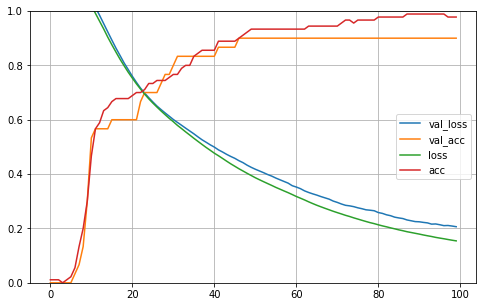

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()